Conducting an Exploratory Data Analysis on Telco Company's Churn  rate to establish relations between various parameters to further establish learning models.

In [37]:
# Import necessary packages to read, process and visualize data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt     # Generate plots
import seaborn as sns               
print("Setup Complete!")

Setup Complete!


Churn rate is defined as the annual percentage rate at which customers stop subscribing to a service or employees leave a job.


In [38]:
# Read the data
filename = "churn.csv"
data = pd.read_csv(filename)

# Let us see the shape of data
print(data.shape)   
# Following output shows there are 7043 rows and 21 columns in our data

(7043, 21)


In [39]:
# First 10 Columns of the data..
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


For establishsing a relation it is better to see the datatypes and general information about it!

In [40]:
# Convert following object type columns to numeric        
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors = 'coerce')

In [41]:
# Let us find if there are any missing values in our data.
print("No. of missing values: \n",data.isnull().sum())

No. of missing values: 
 customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


Output shows that there are 11 total missing values in TotalCharges column.

In [42]:
# Drop CustomerId column as it is not required
data.drop(['customerID'], axis = 1, inplace = True)

# Fill the missing values with 0
data['TotalCharges'] = data['TotalCharges'].fillna(0.0)

# Check for any existing missing values
print("Missing values now: \n", data.isnull().sum())

Missing values now: 
 gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Missing values for all columns are now 0. So, no more missing data.

In [43]:
# Now let us work on categorical features. 
data.gender = [1 if x == "Male" else 0 for x in data.gender]
for col in ('Partner', 'Dependents', 'PhoneService' , 'OnlineSecurity',
        'OnlineBackup','DeviceProtection', 'TechSupport','StreamingTV',
        'StreamingMovies','PaperlessBilling','MultipleLines','Churn'):
    data[col] = [1 if x == "Yes" else 0 for x in data[col]]        
data.head(10)   # See how data looks like now

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
5,0,0,0,0,8,1,1,Fiber optic,0,0,1,0,1,1,Month-to-month,1,Electronic check,99.65,820.50,1
6,1,0,0,1,22,1,1,Fiber optic,0,1,0,0,1,0,Month-to-month,1,Credit card (automatic),89.10,1949.40,0
7,0,0,0,0,10,0,0,DSL,1,0,0,0,0,0,Month-to-month,0,Mailed check,29.75,301.90,0
8,0,0,1,0,28,1,1,Fiber optic,0,0,1,1,1,1,Month-to-month,1,Electronic check,104.80,3046.05,1
9,1,0,0,1,62,1,0,DSL,1,1,0,0,0,0,One year,0,Bank transfer (automatic),56.15,3487.95,0


Now, let us see which features are most effective in causing customer churn. 

In [49]:
'''Correlation :-
Correlation between variables shows how dependent variable changes due to an independent variable under consideration.
(or) how close are two variables to equality.
A value close to +1 signifies strong positive correlation, while close to -1 shows strong negative effect. Correlation coeff.
close to zero signifies weak relation between features.
'''
# Print correlation between all features and target variable
data.corr()['Churn'].sort_values()

tenure             -0.352229
TotalCharges       -0.198324
OnlineSecurity     -0.171226
TechSupport        -0.164674
Dependents         -0.164221
Partner            -0.150448
OnlineBackup       -0.082255
DeviceProtection   -0.066160
gender             -0.008612
PhoneService        0.011942
MultipleLines       0.040102
StreamingMovies     0.061382
StreamingTV         0.063228
SeniorCitizen       0.150889
PaperlessBilling    0.191825
MonthlyCharges      0.193356
Churn               1.000000
Name: Churn, dtype: float64

In [52]:
# To view all column names and their respective data types
data.columns
data.info()
data.describe() # Shows statistical summaries for all numeric columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null int64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null int64
InternetService     7043 non-null object
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null object
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null int64
dtypes: float64(2), int64(15), object(3)
memory usage: 1.1+ MB


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2279.734304,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2266.794470,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,398.550000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1394.550000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,1.000000


([<matplotlib.patches.Wedge at 0x15dcf7632e8>,
 [Text(-0.7393678277834757, 0.8144539368428056, '0'),
  Text(0.7393677515287918, -0.8144540060674139, '1')],
 [Text(-0.4032915424273503, 0.44424760191425755, '73.5%'),
  Text(0.4032915008338864, -0.4442476396731348, '26.5%')])

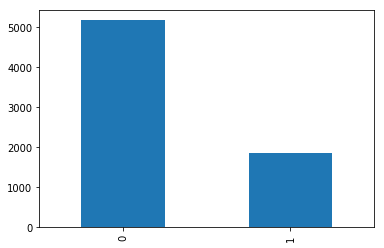

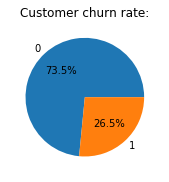

In [46]:
%matplotlib inline

# Plot distribution of dependent/target variable - Churn column
data['Churn'].value_counts().head().plot.bar()   # To generate a bar plot

# To generate a pie chart. Since there are only two classes, a pie chart may look more appealing
sizes = data['Churn'].value_counts(sort = True)
labels = np.unique(data.Churn)

# Visualize the data
plt.figure(figsize = (6,6))
plt.subplot(212)
plt.title("Customer churn rate:")
plt.pie(sizes, labels = labels, autopct='%1.1f%%')

# Bar & pie plots below show that number of customers churned is less than half of not churned.

From above output we can observe :
*  Mean Monthly charges is about 64.76 units and 75% of observations are monthly charged around 89.85
*  The maximum tenure is 72 months with mean being about 32 months.
*  About 50% of customers stayed for 55 months tenure and were charged 70.3 per month  
To get more relevant information, we will visualize attributes of the data and distribution of target variable(Churn)

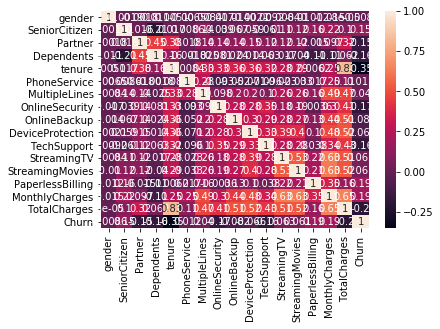

In [47]:
# A heatmap is a two-dimensional graphical representation of data
# where the individual values that are contained in a matrix are represented as colours.
sns.heatmap(data.corr(), annot = True)

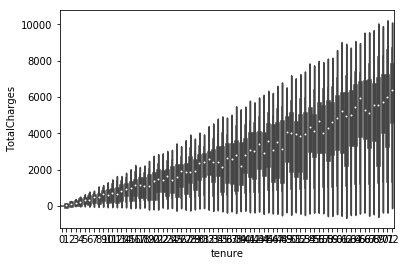

In [48]:
# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

sns.violinplot(x="tenure", y="TotalCharges", data=data, size=8)
plt.show()

In [59]:
target_variable = 'Churn'

In [60]:
def plot_categorical_column(column_name):
    """
    A generic function to plot the distribution of a categorical column, and
    the ratio of Churn in each of the values of that column.
    """
    f, (ax1, ax2) = plt.subplots(2, figsize=(9, 12))
    sns.countplot(x=column_name, data=data, ax=ax1)
    sns.pointplot(x=column_name, y=target_variable, data=data, ax=ax2)
    ax2.set_ylim(0, 0.5)

In [61]:
def plot_continuous_column(column_name):
    """
    A generic function to plot the distribution of a continuous column, and
    boxplot of that column for each value of Churn
    """
    f, (ax1, ax2) = plt.subplots(2, figsize=(9, 12))
    sns.distplot(data[column_name], ax=ax1)
    sns.boxplot(x='Churn', y=column_name, data=data, ax=ax2)

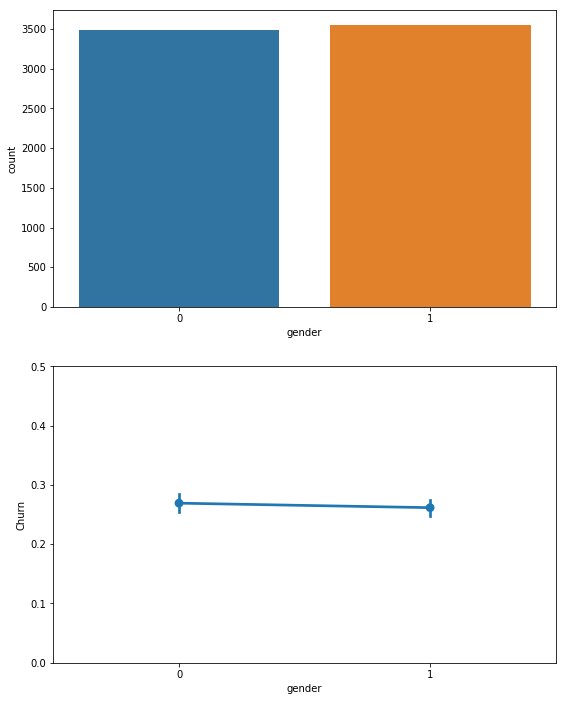

In [62]:
plot_categorical_column('gender')
#observation: The male female Ratio is quite comparable

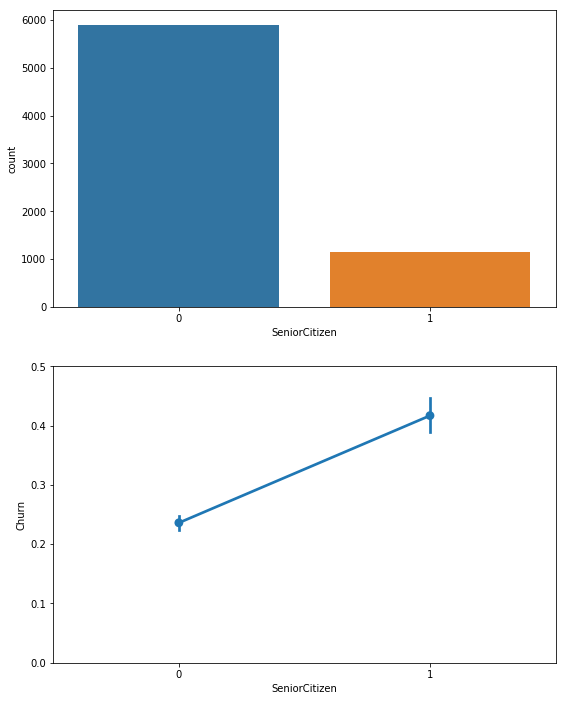

In [63]:
plot_categorical_column('SeniorCitizen')
#The churn probablity of senior citizens is quite high as expected.

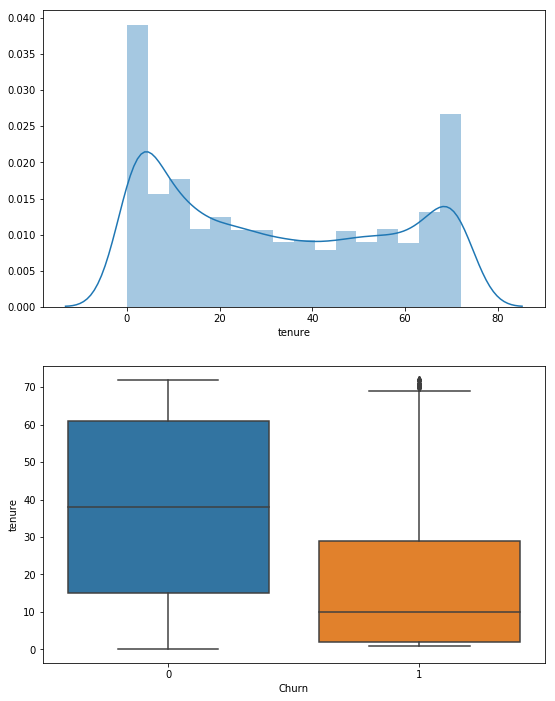

In [64]:
plot_continuous_column('tenure')
#Observation: As expected, people who have less tenure are more likely to churn. 
#When people have been associated for long, they tend to stick around.